#                           Predicting breast cancer in a patient

Observation: Based on the features and parameters given, our data model should perform whether the patient is having Breast Cancer or not.Our model should have more accuracy and higher performance metrics.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#Ignore Warnings
from warnings import filterwarnings
filterwarnings('ignore')
# rcParams
plt.rcParams['figure.figsize']=[10,5]
#'exponential' to float
np.set_printoptions(suppress = True)
pd.options.display.float_format = '{:.2f}'.format

# Load dataset

In [3]:
dataframe = pd.read_csv("cancer.csv")

In [4]:
data = dataframe.copy(deep = True)  #copy of data so that changes will not affect the source data

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


In [ ]:
Observation: Our data set contains 569 rows and 33 columns.

IndependentVariable(Predictorvariables):radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst

Dependent Variable(Target Variable): Diagnosis

The data is labeled whereas gives input and expected output, so we go with Supervised Learning Algorithm.

Data is in the form of Categorical representation that is the output values cannot be compared instead they are given as M or B.

Therefore we go with Classification Model.



# Data Pre-processing

In [ ]:
#Steps involved for Data Processing
# 1. Data type, dimension
# 2. missing data
#3. data correction
#4. Statistical summary


# 1)Data type

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Observation: Our data set consists of 31 Float values, 1 int value and 1 Object value. 

In [7]:
data.shape

(569, 33)

In [8]:
dataframe.shape

(569, 33)

Checking if the data is copied correctly

# 2) Missing data

In [9]:
# to check the missing value
missing_values = dataframe.isnull().sum()
print(missing_values)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
data.drop("Unnamed: 32", axis = 1, inplace = True) #The Unnamed: 32 column contain null values and so the whole column is deleted

In [11]:
data.drop("id", axis = 1, inplace = True)

In [12]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,...,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07
565,M,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,...,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07
566,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,...,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08
567,M,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,...,25.74,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12


# 3)Data Correction

In [13]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Observation:The 'diagnosis' column contains 'object' datatype and it is a categorical data which is invalid as system can only understand numeric data. 

In [14]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Check the unique values present in the column: 'diagnosis'. It contains 'M'and 'B' which can be converted to numeric values representing 0 and 1

In [15]:
diagnosis = pd.get_dummies(data['diagnosis'],drop_first=True)

In [16]:
diagnosis

,M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [17]:
data = pd.concat([data,diagnosis],axis=1)  #appended at the end if axis is 1 denotes columns; axis is 0 denotes rows

In [18]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,1
1,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,1
2,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,1
3,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,1
4,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,...,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07,1
565,M,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,...,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07,1
566,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,...,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08,1
567,M,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,...,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12,1


In [19]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'M'],
      dtype='object')

# Detecting Outliers

In [39]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum() 

M                           0
area_mean                  25
area_se                    65
area_worst                 35
compactness_mean           16
compactness_se             28
compactness_worst          16
concave points_mean        10
concave points_se          19
concave points_worst        0
concavity_mean             18
concavity_se               22
concavity_worst            12
diagnosis                   0
fractal_dimension_mean     15
fractal_dimension_se       28
fractal_dimension_worst    24
perimeter_mean             13
perimeter_se               38
perimeter_worst            15
radius_mean                14
radius_se                  38
radius_worst               17
smoothness_mean             6
smoothness_se              30
smoothness_worst            7
symmetry_mean              15
symmetry_se                27
symmetry_worst             23
texture_mean                7
texture_se                 20
texture_worst               5
dtype: int64

In [40]:
data = data.drop_duplicates()

cap the outlier in the training data, as the testing data may or maynot have the outliers

In [41]:
def capping(data,cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        Up=Q3 + (1.5 * IQR)
        Low=Q1 - (1.5 * IQR)
        
        data[col]=np.where(data[col]> Up,Up,np.where(data[col]<Low,Low,data[col]))

In [42]:
cols=x_train.columns
cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'M'],
      dtype='object')

In [43]:
x_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,...,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,14.14,19.36,92.12,654.90,0.10,0.11,0.09,0.05,0.18,0.06,...,25.81,107.55,880.88,0.13,0.26,0.28,0.12,0.29,0.08,0.38
std,3.46,4.34,23.83,347.32,0.01,0.05,0.08,0.04,0.03,0.01,...,6.14,32.95,563.26,0.02,0.16,0.21,0.06,0.06,0.02,0.49
min,6.98,10.82,43.79,143.50,0.06,0.02,0.00,0.00,0.12,0.05,...,12.49,50.41,185.20,0.08,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.74,16.24,75.52,421.48,0.09,0.07,0.03,0.02,0.16,0.06,...,21.41,84.97,524.05,0.12,0.15,0.12,0.07,0.25,0.07,0.00
50%,13.40,18.89,86.73,552.95,0.10,0.09,0.06,0.03,0.18,0.06,...,25.49,98.04,691.75,0.13,0.22,0.23,0.10,0.28,0.08,0.00
75%,15.75,21.80,103.67,770.55,0.11,0.13,0.13,0.08,0.20,0.07,...,29.70,123.72,1028.50,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.41,0.19,0.30,0.10,...,47.16,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


In [44]:
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3 - Q1
((x_train < (Q1 - 1.5 * IQR)) | (x_train > (Q3 + 1.5 * IQR))).sum()

radius_mean                 8
texture_mean                5
perimeter_mean              8
area_mean                  22
smoothness_mean             4
compactness_mean           12
concavity_mean             13
concave points_mean         3
symmetry_mean              11
fractal_dimension_mean     12
radius_se                  25
texture_se                 12
perimeter_se               26
area_se                    46
smoothness_se              21
compactness_se             22
concavity_se               15
concave points_se          18
symmetry_se                20
fractal_dimension_se       21
radius_worst               14
texture_worst               3
perimeter_worst            12
area_worst                 30
smoothness_worst            5
compactness_worst          13
concavity_worst             8
concave points_worst        0
symmetry_worst             15
fractal_dimension_worst    22
M                           0
dtype: int64

# 4)Statistical description of dataframe 

In [49]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.37
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,0.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


In [50]:
#for categorical summary 
data.describe(include = object) 


,diagnosis
count,569
unique,2
top,B
freq,357


# Exploratory Data Analysis

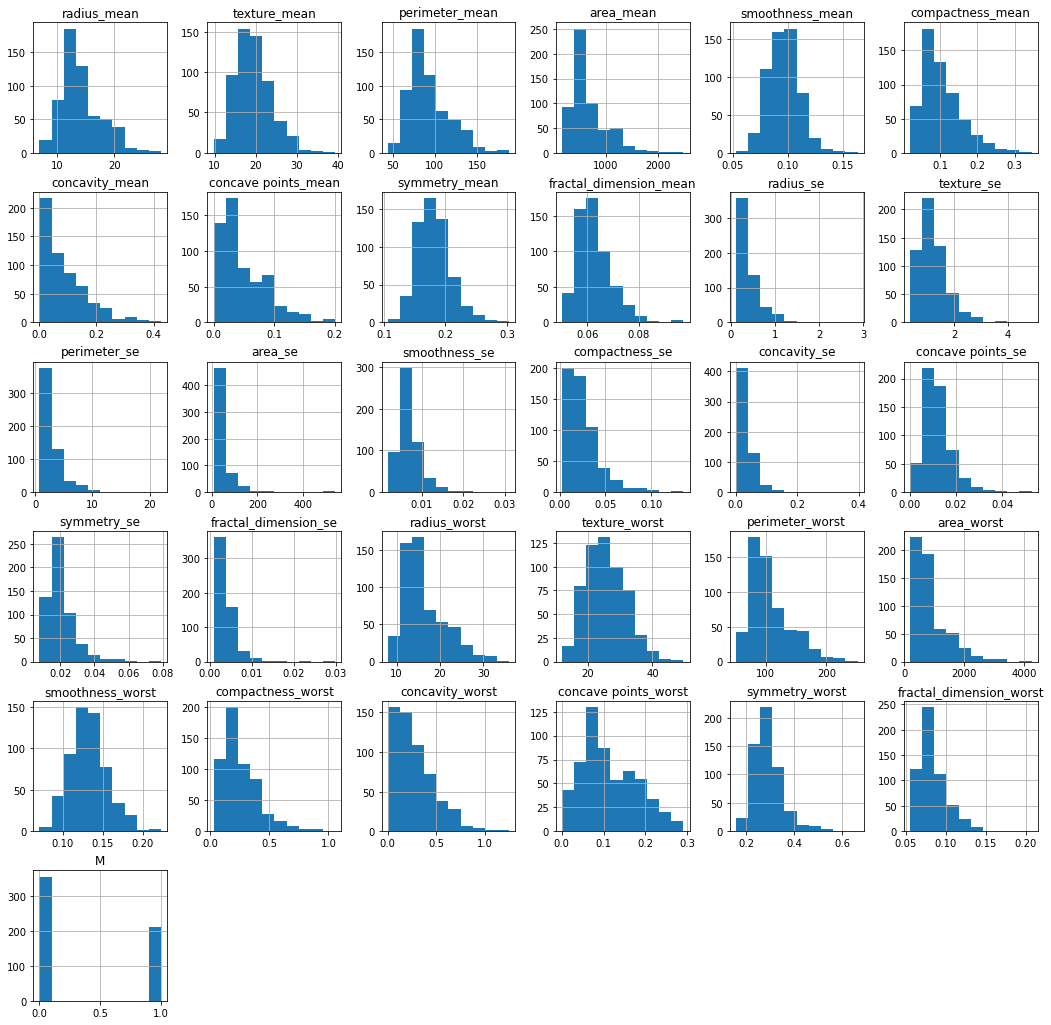

In [51]:
fig= data.hist(figsize = (18,18))

In [52]:
# Univariate Analysis
data.radius_mean.describe()

count   569.00
mean     14.13
std       3.52
min       6.98
25%      11.70
50%      13.37
75%      15.78
max      28.11
Name: radius_mean, dtype: float64

<AxesSubplot:xlabel='radius_mean', ylabel='Density'>

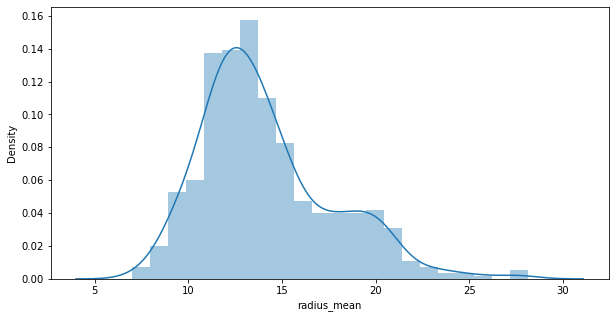

In [53]:
sns.distplot(data.radius_mean)

<function matplotlib.pyplot.show(close=None, block=None)>

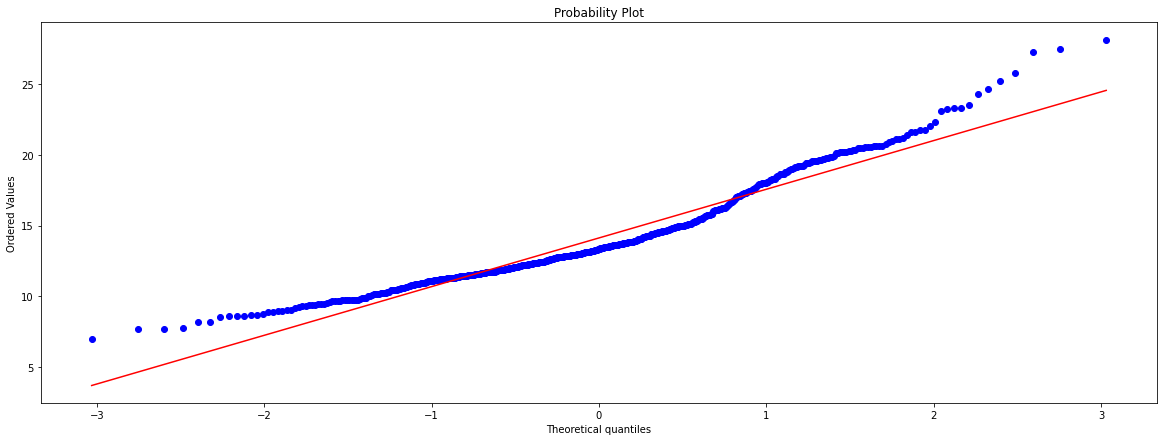

In [54]:
plt.figure(figsize = (20,7))
stats.probplot(data['radius_mean'], plot = plt)
plt.show

In [55]:
print("Skewness: %f" % data['radius_mean'].skew())

Skewness: 0.942380


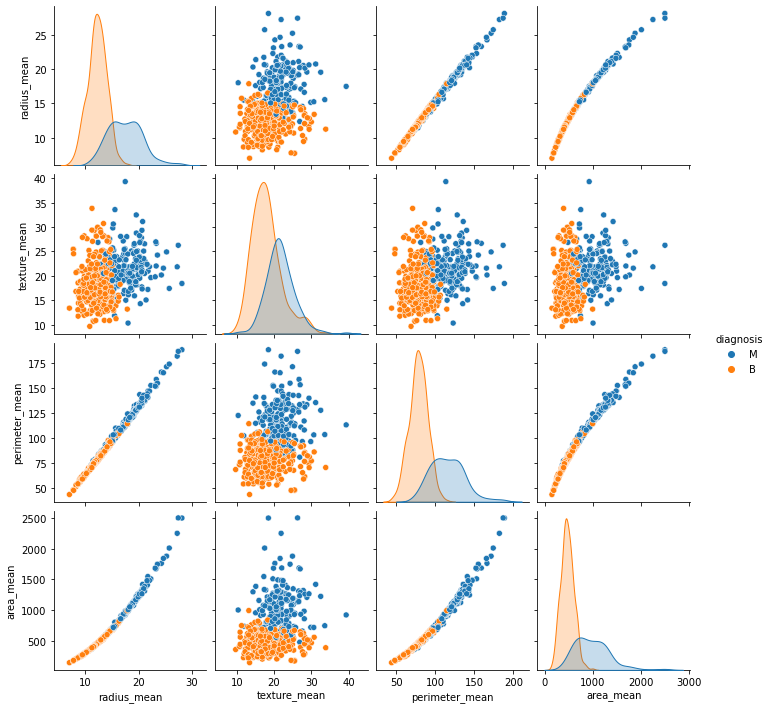

In [56]:
# Multivariate Analysis
# seaborn pairplot is used to plot pairwise relationships between variables within a dataset
sns.pairplot(data.iloc[:,0:5],hue ='diagnosis')

# Feature Engineering

In [57]:
data.shape

(569, 32)

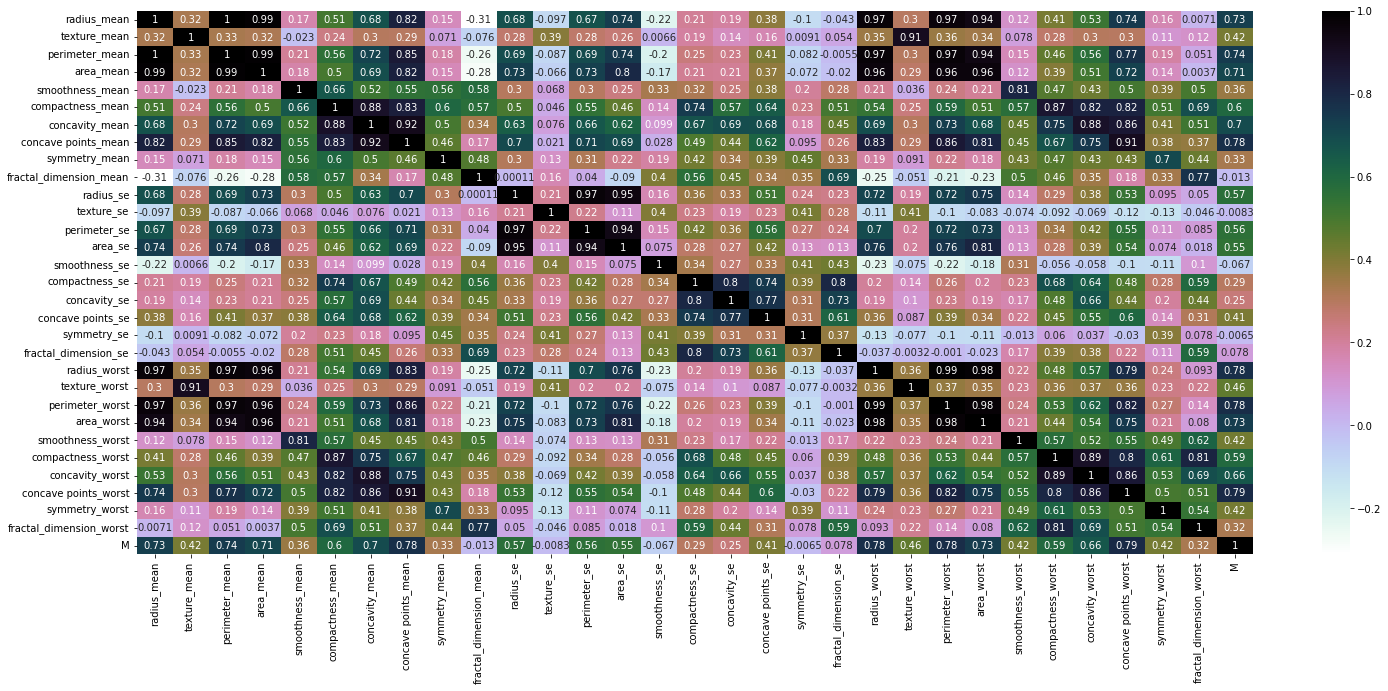

In [58]:
# Heat map allows us to check the correlation of the dataset like how they are correated with two or more continues variables
plt.figure(figsize= (25,10))
sns.heatmap(data.corr(),  annot = True,cmap= "cubehelix_r")
plt.show()


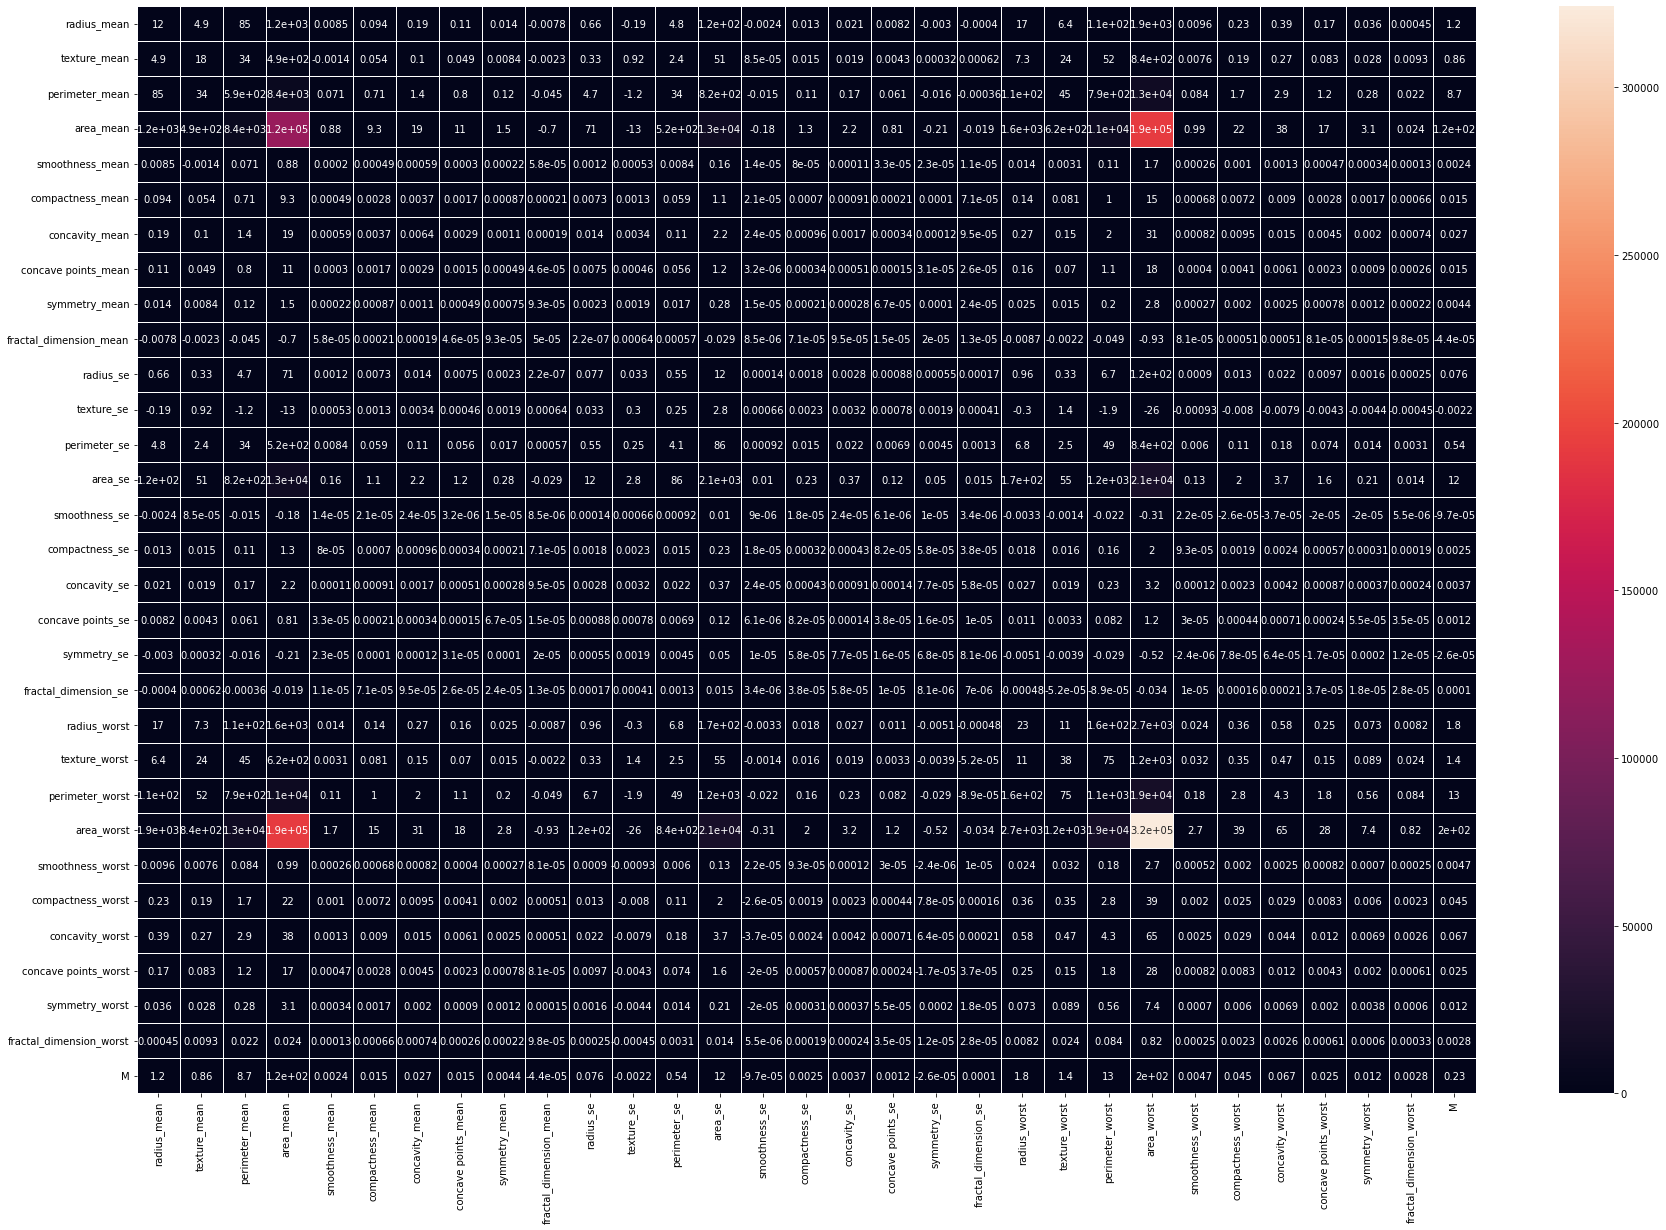

In [59]:
# Covariance
plt.figure(figsize = (30,20))
sns.heatmap(data.cov(), annot = True, linewidth = 0.5)
plt.show()

# Classifier

Let us apply all the possible classification algorithmns and check which is giving the best accuracy for the given dataset

In [20]:
# 1) Logistic Regression

x = data.drop(['diagnosis'],axis=1)
y = data[['diagnosis']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
log = LogisticRegression()
log.fit(x_train,y_train)
predicted = log.predict(x_test)
print("The Accuracy of Logistic Regression is: ",accuracy_score(y_test,predicted))

The Accuracy of Logistic Regression is:  0.9941520467836257


In [21]:
print("The Classification Report of Logistic Regression is: ",classification_report(y_test,predicted))

The Classification Report of Logistic Regression is:                precision    recall  f1-score   support

           B       1.00      0.99      1.00       102
           M       0.99      1.00      0.99        69

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171



In [22]:
# 2) KNN

from sklearn.neighbors import KNeighborsClassifier
x = data.drop(['diagnosis'],axis=1)
y = data[['diagnosis']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
regg = KNeighborsClassifier()
regg.fit(x_train,y_train)
predicted = regg.predict(x_test)
print("The Accuracy of KNN is: ",accuracy_score(y_test,predicted))

The Accuracy of KNN is:  0.9532163742690059


In [23]:
print(confusion_matrix(y_test,predicted))

[[96  1]
 [ 7 67]]


In [24]:
print("The Classification Report of KNN is: ",classification_report(y_test,predicted))

The Classification Report of KNN is:                precision    recall  f1-score   support

           B       0.93      0.99      0.96        97
           M       0.99      0.91      0.94        74

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.95      0.95       171



In [85]:
# 3)SVM
from sklearn.svm import SVC
x = data.drop(['diagnosis'],axis=1)
y = data[['diagnosis']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
sv = SVC()
sv.fit(x_train,y_train)
predicted = sv.predict(x_test)
print("The Accuracy of SVM is: ",accuracy_score(y_test,predicted))

The Accuracy of SVM is:  0.935672514619883


In [86]:
print("The Classification Report of SVM is: ",classification_report(y_test,predicted))

The Classification Report of SVM is:                precision    recall  f1-score   support

           B       0.93      0.98      0.95       113
           M       0.96      0.84      0.90        58

    accuracy                           0.94       171
   macro avg       0.94      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [27]:
# 4)Decision Trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
x = data.drop(['diagnosis'],axis=1)
y = data[['diagnosis']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
obj = DecisionTreeClassifier()
dtree = obj.fit(x_train,y_train)
print("The Accuracy of Decision Tree is: ",accuracy_score(y_test,predicted))


The Accuracy of Decision Tree is:  0.543859649122807


In [28]:
print("The Classification Report of Decision Tree is: ",classification_report(y_test,predicted))

The Classification Report of Decision Tree is:                precision    recall  f1-score   support

           B       0.62      0.73      0.67       108
           M       0.33      0.22      0.26        63

    accuracy                           0.54       171
   macro avg       0.47      0.48      0.47       171
weighted avg       0.51      0.54      0.52       171



In [29]:
print(confusion_matrix(y_test,predicted))

[[79 29]
 [49 14]]


Observations: Out of 4 classification algorithms applied, we got highest accuracy in SVM algorithm. So lets apply SVM model for our dataset.

# Feature Analysis

In [30]:
from sklearn.preprocessing import StandardScaler
feature_scaling = StandardScaler()
x_train= feature_scaling.fit_transform(x_train)
x_test = feature_scaling.fit_transform(x_test)
x_train

array([[ 1.84472738,  2.40669901,  1.99384945, ...,  2.08727108,
         2.27157277,  1.29272617],
       [-0.86952377,  0.76045793, -0.86175185, ...,  0.48618752,
        -0.18590876, -0.77355903],
       [ 1.61543478,  0.55019783,  1.5609934 , ...,  0.31352165,
        -0.06044667,  1.29272617],
       ...,
       [-0.88958687, -1.02675299, -0.86175185, ...,  0.71640869,
         0.40370677, -0.77355903],
       [ 0.12503288,  0.96355008,  0.07388315, ..., -0.7207295 ,
        -0.85879061,  1.29272617],
       [-1.05582401, -1.02197435, -1.02823494, ...,  0.22631666,
         0.72214417, -0.77355903]])

# Classification Report

In [31]:
#Test the model using SVM
SVM = SVC()
SVM.fit(x_train,y_train)
predicted_xtest = SVM.predict(x_test)
predicted_xtrain = SVM.predict(x_train)
print(classification_report(y_test,predicted_xtest))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       108
           M       1.00      1.00      1.00        63

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



# Accuracy of Training Data

In [32]:
print(accuracy_score(y_train,predicted_xtrain))

1.0


# Accuracy of Testing Data

In [33]:
print(accuracy_score(y_test,predicted_xtest))

1.0


Observation: In both training and testing data we got accuracy as 1.0, therefore we got 100% accuracy in the SVM model.
This concludes that both training and testing data are perfectly fitted.

In [71]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [72]:
#from sklearn import svm
from sklearn.svm import SVC

SVM = SVC(kernel='linear', gamma='scale')
SVM.fit(x_train, y_train) 

SVC(kernel='linear')

# Predicting the test test results

In [73]:
y_pred = SVM.predict(x_test)
y_pred

array(['M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'M'], dtype=object)

# Confusion Metrics

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

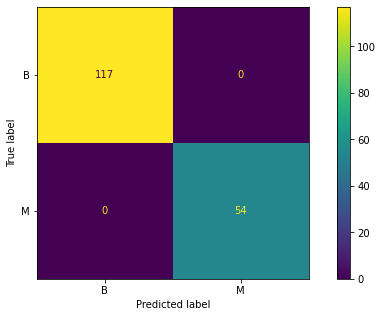

In [76]:
cnf_matrix_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_test, display_labels=SVM.classes_).plot()

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[117   0]
 [  0  54]]
The model accuracy is 1.0


<AxesSubplot:>

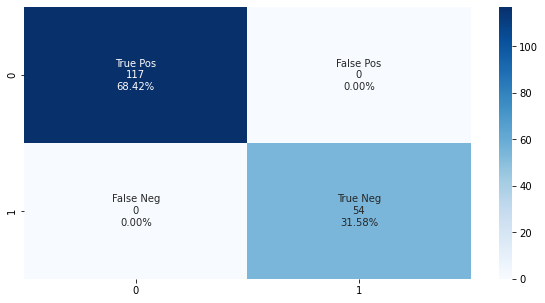

In [87]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [78]:
from sklearn.metrics import classification_report
predictions = SVM.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       117
           M       1.00      1.00      1.00        54

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



# Conclusion: We got 100% accuracy in both training and testing data using SVM model. Hence we can say that our data set is perfectly fitted